In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# 데이터셋 불러오기
data = pd.read_csv("/content/drive/MyDrive/chatGPT_final.csv", names = ['번호', '감정', '문장'], header=0)
data.loc[data['감정']=='긍정(포지티브)', '감정']="긍정"
data.loc[data['감정']=='부정(네거티브)', '감정']="부정"
data.loc[data['감정']=='중립', '감정']="부정"

In [2]:
data['감정'].unique()

array(['긍정', '부정'], dtype=object)

In [3]:
# 문장과 라벨 분리
sentences = data["문장"]
labels = data["감정"]

# train, test 데이터셋 분리
train_sentences, test_sentences, train_labels, test_labels = train_test_split(sentences, labels, test_size=0.2, random_state=42)

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
train_features = vectorizer.fit_transform(train_sentences)
test_features = vectorizer.transform(test_sentences)

# 분류 모델 학습
model = LinearSVC()
model.fit(train_features, train_labels)

# 테스트 데이터셋 예측
predictions = model.predict(test_features)

# 분류 결과 출력
print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

          긍정       0.43      0.08      0.14        36
          부정       0.78      0.97      0.87       124

    accuracy                           0.77       160
   macro avg       0.61      0.53      0.50       160
weighted avg       0.70      0.77      0.70       160



In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
p_text = data[data['감정']=='긍정']
p_text

,번호,감정,문장
0,1,긍정,chatgpt passes mba exam given by a wharton pro...
1,2,긍정,chatgpt is trending on twitter past few weeks ...
8,9,긍정,this is what alexa should have been
9,10,긍정,can chatgpt create good course outlines
10,11,긍정,seems to work pretty well at giving you good r...
...,...,...,...
761,762,긍정,dude copilot chatgpt tabnine kite and about a ...
778,779,긍정,i ve been already familiar with quantum physic...
784,785,긍정,microsoft pours billions into new deal with co...
786,787,긍정,i asked chat gpt to write a dad joke about goi...


In [ ]:
n_text = data[data['감정']=='부정']
n_text

,번호,감정,문장
2,3,부정,chatgpt passing medical and bar exams tells yo...
3,4,부정,let s have chat gpt do an end of life conversa...
4,5,부정,i asked chatgpt if scott was pro vax
5,6,부정,chatgpt in 3 years
6,7,부정,if you re using chatgpt or similar instead of ...
...,...,...,...
794,795,부정,maybe the trudeau govt should consult chatgpt ...
795,796,부정,just copy and paste a chatgpt response into a ...
796,797,부정,chat gpt says it s cooperative multitasking
797,798,부정,chatgpt s opinion on do you think its wrong fo...


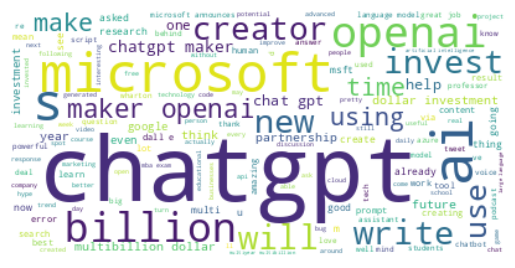

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_combined = ' '.join(p_text['문장'].tolist())
wordcloud = WordCloud(background_color='white').generate(text_combined)

# 워드클라우드 출력
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

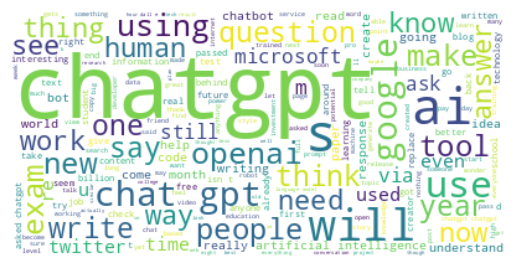

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_combined = ' '.join(n_text['문장'].tolist())
wordcloud = WordCloud(background_color='white').generate(text_combined)

# 워드클라우드 출력
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()